In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# Time variable
t = np.arange(0, 15, 0.01)

In [37]:
# Desired trajectory
T = 15
Tsq = T**2
Tcb = T**3

In [38]:
# Matrix A for calculating trajectory coefficients
A = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [1, T, Tsq, Tcb, 0, 0, 0, 0],
    [0, 1, 2*T, 3*Tsq, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, T, Tsq, Tcb],
    [0, 0, 0, 0, 0, 1, 2*T, 3*Tsq]
])

In [39]:
# Vector b for calculating trajectory coefficients
b = np.array([
    [0],
    [0],
    [0],
    [-0.5],
    [5],
    [0],
    [5],
    [-0.5]
])

In [40]:
# Calculate pseudo inverse of A
A_inv = np.linalg.pinv(A)

# Calculate x
x = np.matmul(A_inv, b)

In [41]:
# Extract coefficients from x
a11, a12, a13, a14 = x[:4]
a21, a22, a23, a24 = x[4:8]

In [42]:
# Calculate trajectories X and Y
X = a11 + a12 * t + a13 * t**2 + a14 * t**3
Y = a21 + a22 * t + a23 * t**2 + a24 * t**3

In [43]:
# Calculate gradients and other derived values
dX = np.gradient(X, t)
dY = np.gradient(Y, t)
theta = np.arctan2(dY, dX)
V = np.sqrt(dX**2 + dY**2)
a = np.cos(theta) * np.gradient(dX, t) + np.sin(theta) * np.gradient(dY, t)
omega = (-np.sin(theta) * np.gradient(dX, t) + np.cos(theta) * np.gradient(dY, t)) / V

In [44]:
# Noise levels for velocity and angle
noise_std_v = 0.01
noise_std_theta = 0.001

In [45]:
# Generate noise
noise_v = np.random.normal(0, noise_std_v, len(t))
noise_theta = np.random.normal(0, noise_std_theta, len(t))

In [46]:
# Initialize state variables
x_final = X[0]
y_final = Y[0]
theta_final = theta[0]
V_final = V[0]

In [47]:
# Lists to store robot trajectory states
x_states = [x_final]
y_states = [y_final]

In [48]:
# Calculate robot trajectory
for i in range(1, len(t)):
    dt = t[i] - t[i - 1]
    x_final += V_final * np.cos(theta_final) * dt
    y_final += V_final * np.sin(theta_final) * dt
    theta_final += omega[i] * dt + noise_theta[i]
    V_final += a[i] * dt + noise_v[i]
    x_states.append(x_final)
    y_states.append(y_final)

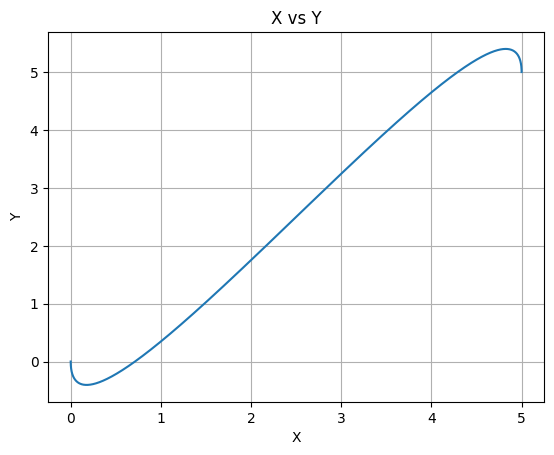

In [49]:
# Plot X vs Y
plt.figure()
plt.plot(X, Y)
plt.title('X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

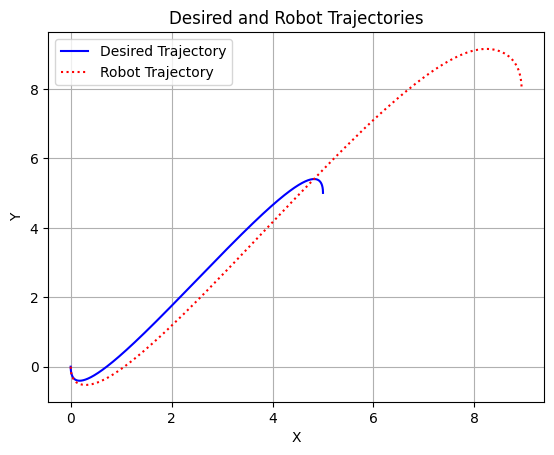

In [50]:
# Plot desired and robot trajectories
plt.figure()
plt.plot(X, Y, label='Desired Trajectory', color='blue')
plt.plot(x_states, y_states, label='Robot Trajectory', linestyle='dotted', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Desired and Robot Trajectories')
plt.grid(True)
plt.show()

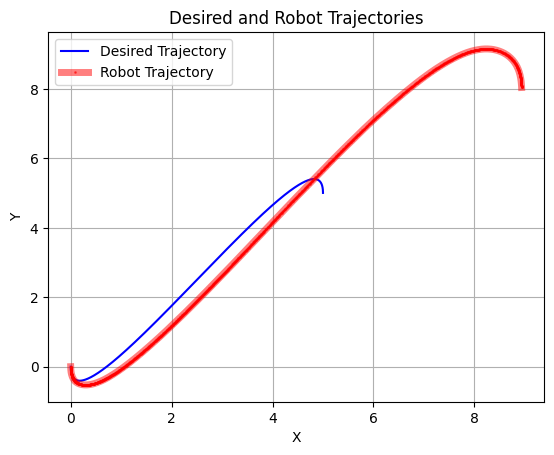

In [51]:
# Plot desired and robot trajectories with additional properties
plt.figure()
plt.plot(X, Y, label='Desired Trajectory', color='blue')
plt.plot(x_states, y_states, label='Robot Trajectory', linestyle='-', linewidth=5, color='red', alpha=0.5, marker='o', markersize=1, markeredgecolor='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Desired and Robot Trajectories')
plt.grid(True)
plt.show()